In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
sys.path.append("../../")
from neurotools.ns5_tools.ns5_tools import ns5Files
from neurotools.utils.trigger import trigger
from neurotools.emg_tools.emg_channel import eEMG

In [28]:
data_file = "./source/emg_single_channel_block.hdf5"
overwrite = True
if not (os.path.isfile(data_file)) or overwrite:
    ns5_path = "./source/UA057_BLK_OS_BGM2_10KHz_0007.ns5"
    ns5_file = ns5Files(ns5_path)
    used_labels = ns5_file.get_analog_entitie_labels()[0:4]
    used_labels += ['Tr0 ', 'Tr1 ']
    ns5_file.to_hdf(data_file,used_labels)
df_emg = pd.read_hdf(data_file)

In [ ]:
print(df_emg.key())

In [29]:
t = np.array(df_emg['time'])
emg_1 = eEMG(df_emg['raw 1'],t)
emg_2 = eEMG(df_emg['raw 2'],t)
emg_3 = eEMG(df_emg['raw 3'],t)

fig, ax = plt.subplots() 
emg_1.plot_raw(ax)
emg_2.plot_raw(ax)
emg_3.plot_raw(ax)

KeyError: 'raw 1'

(-1500.0, 1500.0)

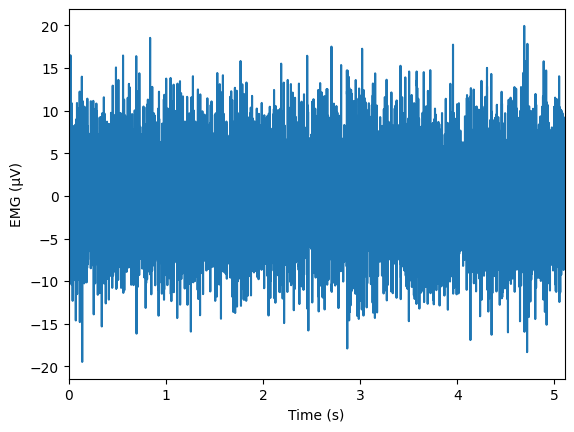

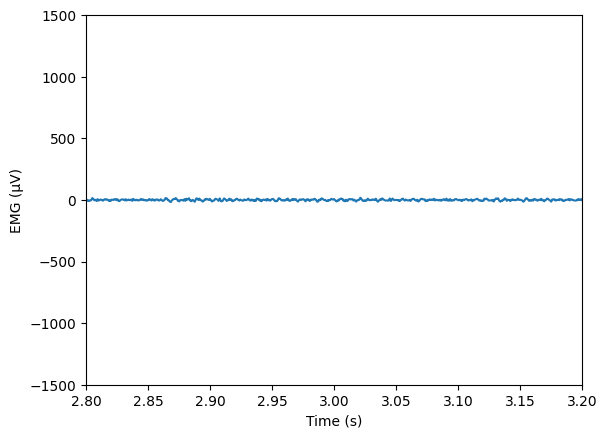

In [22]:
f_LPF = 1_000
o_LFP = 5
emg_1.LPF(f_LPF,o_LFP)

f_HPF = 100
o_HFP = 5
emg_1.HPF(f_HPF,o_HFP)

fig, ax = plt.subplots() 
emg_1.plot(ax)



fig, ax = plt.subplots() 
emg_1.plot(ax)
ax.set_xlim(2.8,3.2)
ax.set_ylim(-1500,1500)

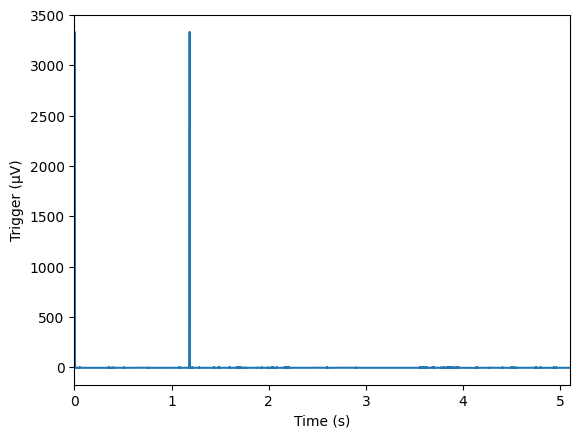

In [23]:
fig, ax = plt.subplots() 
tr = trigger(df_emg['Tr0 '],t)
tr.plot_raw(ax)

In [24]:

emg_1.trigger = trigger(df_emg['Tr0 '],t)

emg_1.get_eCMAPS(0.1,0.00)


fig, ax = plt.subplots() 


emg_1.plot_eCMAPS(ax,color = 'b', alpha = 0.05)
emg_1.plot_avg_eCMAPS(ax)

UnboundLocalError: cannot access local variable 'data' where it is not associated with a value